# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.ndimage import gaussian_filter
import os

# Import the OpenWeatherMap API key
# Import API key
from dotenv import load_dotenv
load_dotenv()

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [104]:
# Set the API base URL
api_key = os.getenv('Weather_API')
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = 'imperial'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat']) 
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date_unformatted = (city_weather['dt'])
        city_date_struct = time.localtime(city_date_unformatted)
        city_date = time.strftime('%y-%m-%d', city_date_struct)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | raja
Processing Record 2 of Set 1 | barrow in furness
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 1 | oranjemund
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | ekangala
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | cabedelo
Processing Record 18 of Set 1 | vorkuta
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2

In [105]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [106]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,raja,8.4596,25.6780,68.95,83,100,4.23,SS,24-06-29
1,barrow in furness,54.1167,-3.2333,52.81,83,4,13.31,GB,24-06-29
2,hadibu,12.6500,54.0333,79.77,79,95,23.42,YE,24-06-29
3,oranjemund,-28.5500,16.4333,58.48,79,100,4.38,NA,24-06-29
4,longyearbyen,78.2186,15.6401,46.24,61,0,16.11,SJ,24-06-29


In [107]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [108]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,raja,8.4596,25.6780,68.95,83,100,4.23,SS,24-06-29
1,barrow in furness,54.1167,-3.2333,52.81,83,4,13.31,GB,24-06-29
2,hadibu,12.6500,54.0333,79.77,79,95,23.42,YE,24-06-29
3,oranjemund,-28.5500,16.4333,58.48,79,100,4.38,NaN,24-06-29
4,longyearbyen,78.2186,15.6401,46.24,61,0,16.11,SJ,24-06-29


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

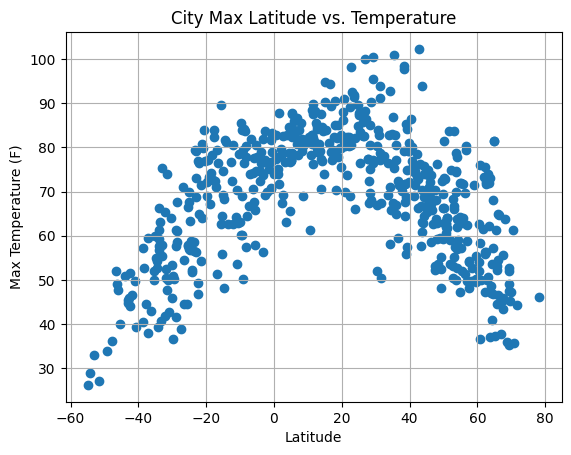

In [109]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

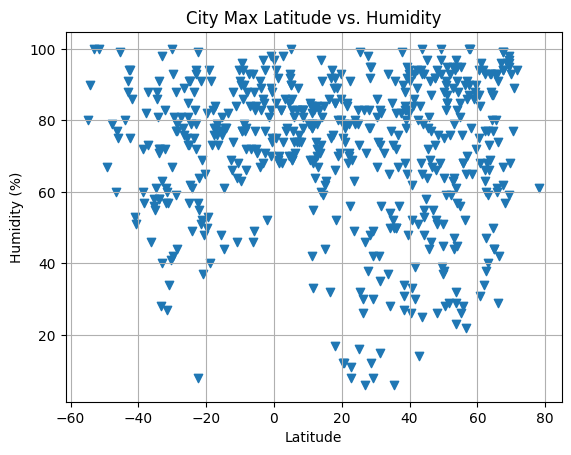

In [133]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="v")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

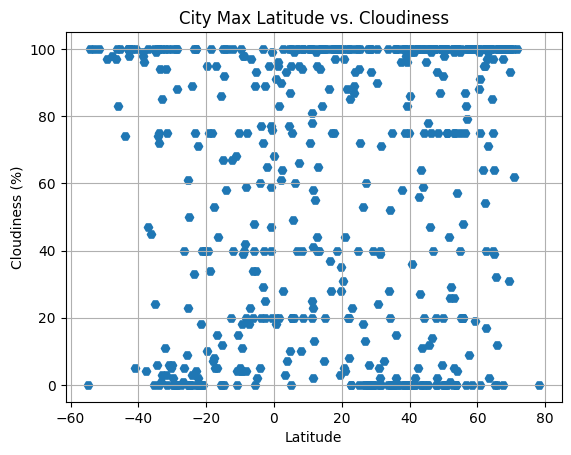

In [112]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="H")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

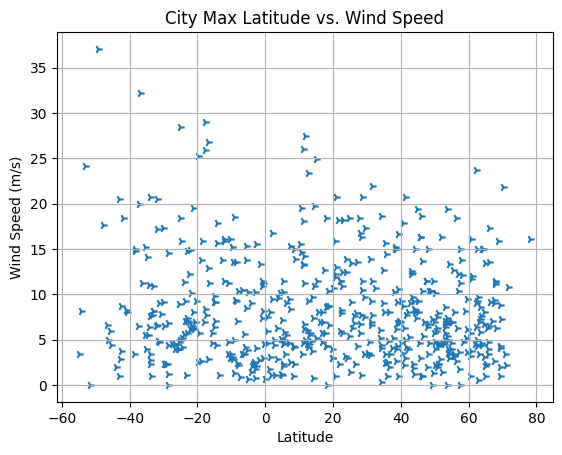

In [113]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="4")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [143]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel='X', ylabel='Y', marker='o'):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Create the regression line
    x_reg = np.linspace(min(x), max(x), 100)
    y_reg = intercept + slope * x_reg
    
    # Plot the data points
    plt.scatter(x, y, color='blue', label='Data points', marker=marker)
    
    # Plot the regression line
    plt.plot(x_reg, y_reg, color='red', linewidth=2, label='Regression line')
    
     # Calculate r-squared
    r_squared = r_value ** 2
  
  # Add regression equation and r-value to the plot
    equation_text = f'y = {intercept:.2f} + {slope:.2f}x\n$r^2$ = {r_squared:.2f}'
    
    # Place the text in the bottom-left corner
    plt.figtext(0.005, 0.005, equation_text, fontsize=10, color='red', ha='left', va='bottom')
    
   
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Display the plot
    plt.show()

In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,raja,8.4596,25.6780,68.95,83,100,4.23,SS,24-06-29
1,barrow in furness,54.1167,-3.2333,52.81,83,4,13.31,GB,24-06-29
2,hadibu,12.6500,54.0333,79.77,79,95,23.42,YE,24-06-29
4,longyearbyen,78.2186,15.6401,46.24,61,0,16.11,SJ,24-06-29
5,stanley,54.8680,-1.6985,47.28,85,40,4.61,GB,24-06-29


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,oranjemund,-28.5500,16.4333,58.48,79,100,4.38,NaN,24-06-29
6,waitangi,-43.9535,-176.5597,50.83,80,74,1.99,NZ,24-06-29
8,edinburgh of the seven seas,-37.0676,-12.3116,59.49,88,100,32.21,SH,24-06-29
9,touros,-5.1989,-35.4608,74.68,84,34,10.27,BR,24-06-29
11,puerto natales,-51.7236,-72.4875,27.05,100,100,0.00,CL,24-06-29


###  Temperature vs. Latitude Linear Regression Plot

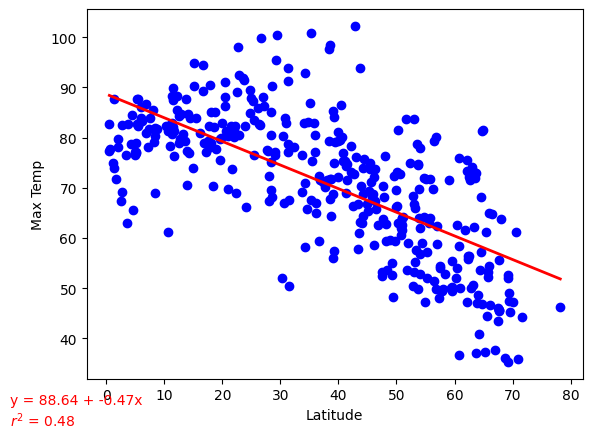

In [144]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], xlabel='Latitude', ylabel='Max Temp')

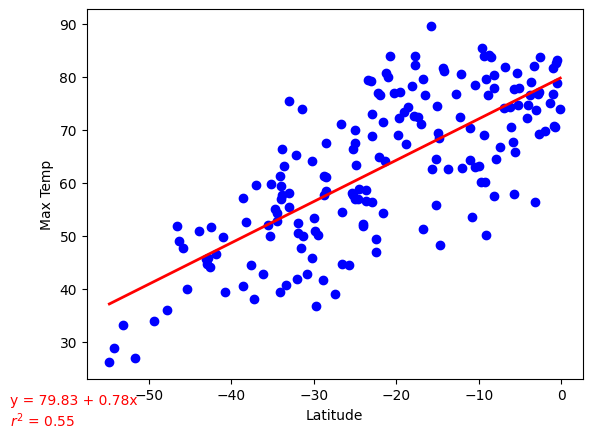

In [145]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], xlabel='Latitude', ylabel='Max Temp')

**Discussion about the linear relationship:**  
From these plots it is clear that there is predictive value between the latitude and temperature. For the Northern hemisphere as latitude increases, temperature decreases. For the southern hemisphere, the inverse is true, temperature goes up when the latitude deceases. This only makes sense because the warmest climate is centered around the equator. The r^2 values indicate that ~50% variance in the model is related to latitude.

### Humidity vs. Latitude Linear Regression Plot

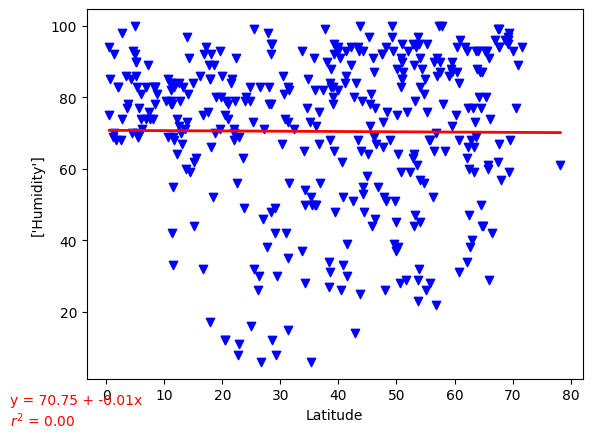

In [146]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], xlabel='Latitude', ylabel=["Humidity"], marker='v')

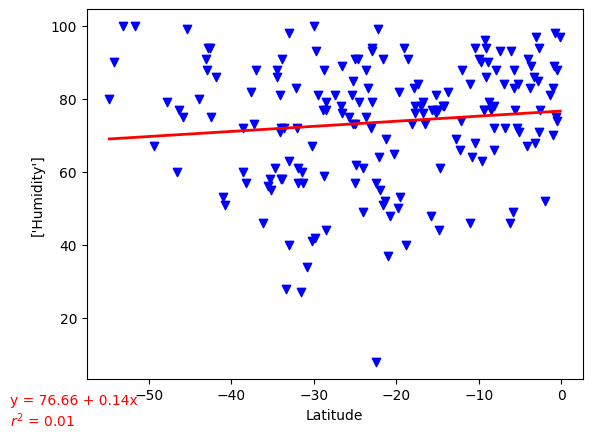

In [147]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], xlabel='Latitude', ylabel=["Humidity"], marker='v')

**Discussion about the linear relationship:**  
These plots make it clear that it is essentially not possible to predict humidity based on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

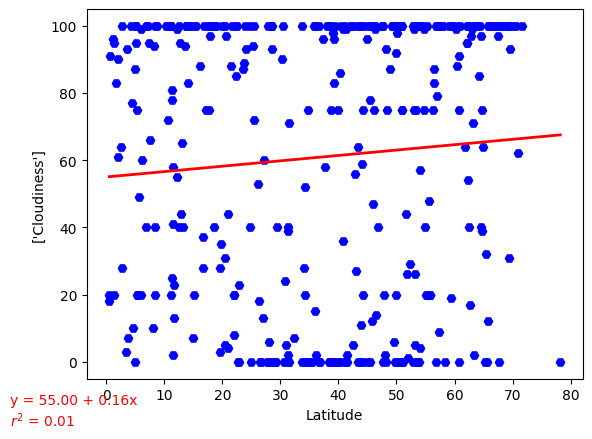

In [148]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], xlabel='Latitude', ylabel=["Cloudiness"], marker='H')

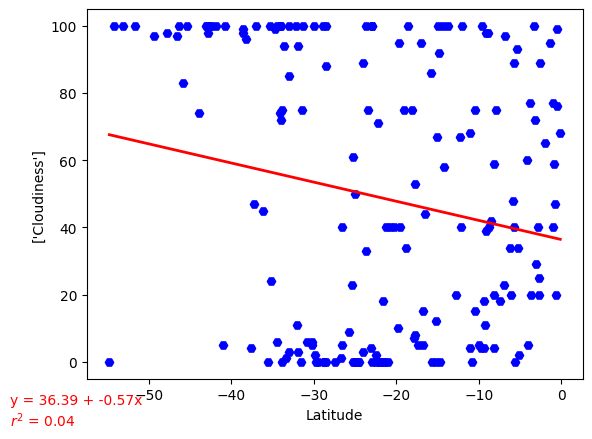

In [149]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], xlabel='Latitude', ylabel=["Cloudiness"], marker='H')

**Discussion about the linear relationship:**  
There again is almost a non existent relationship between latitude and cloudiness, with at most, 4% of the of the model predicting cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

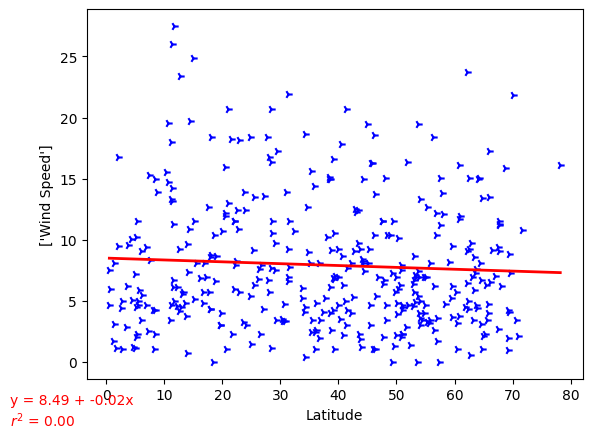

In [150]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], xlabel='Latitude', ylabel=["Wind Speed"], marker='4')

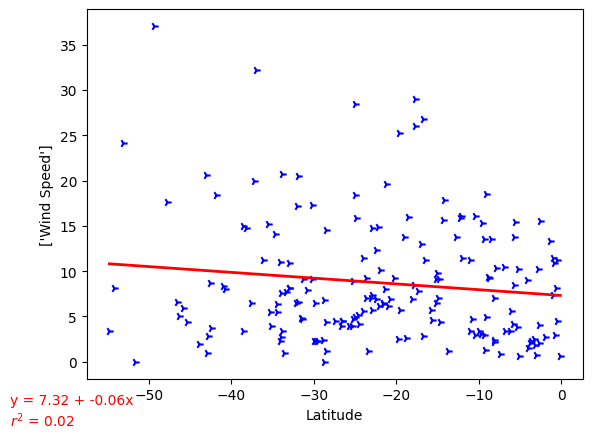

In [151]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], xlabel='Latitude', ylabel=["Wind Speed"], marker='4')

**Discussion about the linear relationship:**  
Latitude shows that it cannot be used as a predictive variable for wind speed.